In [2]:
%load_ext autoreload
%autoreload 2

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from cvae_featurization import *
import time
import pickle as pkl

import sys, os
os.environ["CUDA_VISIBLE_DEVICES"]="3"
from hyperopt import fmin, tpe, hp, STATUS_OK

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# imputation_strategies = ["mp_fraction", "pca", "one_hot"]
# featurizations = ["pca", "mp_fraction"]

# start = time.time()

# for imputation_strategy in imputation_strategies:
#     for featurization in featurizations:
#         if os.path.exists("data/" + imputation_strategy + "_" + featurization + ".json"):
#             continue
        
#         print(imputation_strategy, featurization)
#         only_ss_rxns, ss_precursor_nomenclature = impute_data(imputation_strategy)
        
#         file_name = 'data/only_ss_rxns_' + imputation_strategy + '.pkl'
#         if os.path.exists(file_name):
#             del only_ss_rxns
#             with open(file_name, 'rb') as f:
#                 only_ss_rxns = pickle.load(f)
#         else:
#             with open(file_name, 'wb') as f:
#                 pickle.dump(only_ss_rxns, f)
#         df, prec_magpie_feats = featurize(featurization, only_ss_rxns, ss_precursor_nomenclature)
        
#         if featurization == "mp_fraction":
#             prec_magpie_feats = prec_magpie_feats.values
            
#         objective = "temp_time_vector"
#         omit_columns = ['targets', 'precursors', objective, 'composition_obj']
#         X_columns = [x for x in df.columns if x not in omit_columns]
#         y_column = objective
#         X_df = df[X_columns]
#         X_columns = list(X_df.columns)
#         X = X_df.values
#         y = df[y_column].values

#         X, y, prec_magpie_feats, full_df = shuffle(X, y, prec_magpie_feats, df, random_state=42)

#         y = np.vstack(y)
#         print("Shape of X: {}".format(X.shape))
#         print("Shape of y: {}".format(y.shape))
        
#         best_params, y_pred_train, y_pred_test, X_train_k, X_test_k, y_train_k, y_test_k, n_pts_train_k, n_pts_test_k, histories = train(X, y, prec_magpie_feats, full_df)
        
#         evaluate(imputation_strategy, featurization, y_pred_test, y_test_k)
        
#         print((time.time() - start) / 60)
#         print('--------------')
        

In [ ]:
imputation_strategy = "one_hot"
featurization = "mp_fraction"

start = time.time()

print(imputation_strategy, featurization)
_, ss_precursor_nomenclature = impute_data(imputation_strategy)

file_name = 'data/only_ss_rxns_' + imputation_strategy + '.pkl'

with open(file_name, 'rb') as f:
    only_ss_rxns = pickle.load(f)

df, prec_magpie_feats = featurize(featurization, only_ss_rxns, ss_precursor_nomenclature)

if featurization == "mp_fraction":
    prec_magpie_feats = prec_magpie_feats.values

objective = "temp_time_vector"
omit_columns = ['targets', 'precursors', objective, 'composition_obj']
X_columns = [x for x in df.columns if x not in omit_columns]
y_column = objective
X_df = df[X_columns]
X_columns = list(X_df.columns)
X = X_df.values
y = df[y_column].values

X, y, prec_magpie_feats, full_df = shuffle(X, y, prec_magpie_feats, df, random_state=42)

y = np.vstack(y)
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

best_params, y_pred_train, y_pred_test, X_train_k, X_test_k, y_train_k, y_test_k, n_pts_train_k, n_pts_test_k, histories, X_train_df, X_test_df = train(X, y, prec_magpie_feats, full_df)

results = evaluate(imputation_strategy, featurization, y_pred_test, y_test_k)

print((time.time() - start) / 60)
print('--------------')


one_hot mp_fraction
Returning extracted data of 51574/31782 reactions.


100%|██████████| 51574/51574 [00:05<00:00, 10041.98it/s]



Shape of X: (31042, 103)
Shape of y: (31042, 8)
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]WARNING:tensorflow:From /home/synthesisproject/anaconda3/envs/syn_gen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 22349 samples, validate on 5588 samples      
Epoch 1/500                                           
  0%|          | 0/20 [00:01<?, ?trial/s, best loss=?]WARNING:tensorflow:From /home/synthesisproject/anaconda3/envs/syn_gen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.





 - 4s - loss: 6.4061 - mean_squared_error: 0.7702 - val_loss: 5.4620 - val_mean_squared_error: 0.6348

Epoch 2/500                                           
 - 2s 

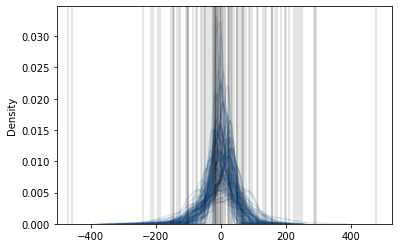

In [24]:
fold = 0
operation = 1
temp = np.vstack([np.mean(x['temp_time_vector'], axis=0) for x in y_test_k[fold]])
true_scatter = []
for i in range(100):
    mean = np.mean(y_pred_test[fold][i, :, operation])
    sns.kdeplot(y_pred_test[fold][i, :, operation] - mean, color = (0.1, 0.3, 0.5, 0.15))
    # sns.kdeplot(y_pred_test[fold][i, :, operation])
    true_scatter.append(temp[i][operation] - mean)
for i in range(100):
     plt.axvline(x=true_scatter[i], color='black', linewidth=2, alpha=0.1)

In [29]:
# all_results = [best_params, y_pred_train, y_pred_test, X_train_k, X_test_k, y_train_k, y_test_k, n_pts_train_k, n_pts_test_k, histories, X_train_df, X_test_df]
# with open('data/trained_model_results.pkl', 'wb') as f:
#     pkl.dump(all_results, f)
# with open('data/trained_model_metrics.pkl', 'wb') as f:
#     pkl.dump(results, f)

In [6]:
with open('data/only_ss_rxns_one_hot.pkl', 'rb') as f:
    poo = pkl.load(f)

In [21]:
for i, fold in enumerate(y_test_k):
    for x in fold:
        try:
            np.mean(x['temp_time_vector'], axis=0)
        except Exception as e:
            print(i)
            break

1
3
5
7
9
11
13
15
17
19


In [28]:
y_test_k_good = []
for i in range(len(y_test_k)):
    if i % 2 == 0:
        y_test_k_good.append(y_test_k[i])

In [32]:
results = evaluate(imputation_strategy, featurization, y_pred_test, y_test_k_good)